### NYU CDS

### Fall 2021

### Introduction to Data Science

### Project 2

### student netid: jw7383

### deadline: Dec 06, 2021, 11:59pm

---
# Data analysis Project 2
### Correlation and Regression of Movie Ratings Data
---

### Dataset description

This dataset features ratings data of 400 movies from 1097 research participants. 

* 1st row: Headers (Movie titles/questions) – note that the indexing in this list is from 1
* Row 2-1098: Responses from individual participants
* Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)
* Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)
* Columns 422-464: These columns contain responses to personality questions (1-5)
* Columns 465-474: These columns contain self-reported movie experience ratings (1-5)
* Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)
* Column 476: Only child (1 = yes, 0 = no, -1 = no response)
* Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)

Note that we did most of the data munging for you already (e.g. Python interprets commas in a csv file as separators, so we removed all commas from movie titles), but you still need to handle missing data.




### Q1:


**Note:** For all missing values in the data, use the average of the corresponding column so to fill in the missing data. 



In this problem, under **the most correlated**, we consider the largest correlation in the absolute value.


1.1. For every user in the given data, find its most correlated user. 

1.2. What is the pair of the most correlated users in the data? 

1.3. What is the value of this highest correlation?

1.4. For users 0, 1, 2, \dots, 9, print their most correlated users. 



In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import ratings data
data = pd.read_csv('movieReplicationSet.csv', delimiter = ',', usecols = list(range(400)))

# Fill NA's with their column mean
column_means = data.mean()
data = data.fillna(column_means)

In [2]:
# Calculate correlation matrix
corr_matrix = data.transpose().corr()

# Take the absolute value of the matrix to yield correlation magnitude
corr_matrix = corr_matrix.abs()

# Set the diagonals to 0
corr_matrix.values[tuple([np.arange(corr_matrix.shape[0])]*2)] = 0

# Now each user's most correlated user is the maximum value in its row
most_correlated_users = corr_matrix.idxmax()

In [3]:
# Print each user's most correlated user
pd.DataFrame(most_correlated_users).T

,0,1,2,3,4,5,6,7,8,9,...,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096
0,118,831,896,19,784,990,1071,1074,821,1004,...,1048,818,352,896,896,896,784,896,896,710


In [4]:
# Calculate each user's maximum correlation
max_corr = corr_matrix.max()

# Find the pair of most correlated users
user1 = max_corr.idxmax()
user2 = most_correlated_users[user1]
print(f"The pair of most correlated users are users {user1} and {user2}")

The pair of most correlated users are users 831 and 896


In [5]:
# Print the max correlation
print(f"Their max correlation is {max_corr.max()}")

Their max correlation is 0.9987890924779799


In [6]:
# Print the most correlated user for the first 10 users
print("For the first 10 users, their most correlated user is:")
most_correlated_users.head(10)

For the first 10 users, their most correlated user is:


0     118
1     831
2     896
3      19
4     784
5     990
6    1071
7    1074
8     821
9    1004
dtype: int64

### Q2:

We want to find a model between the ratings and the personal part of the data. To do so, consider:


**Part 1**: the ratings of all users over columns 1-400: 

-- Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing);

call this part `df_rate`


and 


**Part 2**:  the part of the data which includes all users over columns 401-474

-- Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)

-- Columns 422-464: These columns contain responses to personality questions (1-5)

-- Columns 465-474: These columns contain self-reported movie experience ratings (1-5)

call this part `df_pers`.

---

Our main task is to model: 


`df_pers = function(df_rate)`


---

**Note:** Split the original data into training and testing as the ratio 0.80: 0.20. 


2.1. Model `df_pers = function(df_rate)` by using the linear regression. 

What are the errors on: (i) the training part; (ii) the testing part?




2.2. Model `df_pers = function(df_rate)` by using the ridge regression with hyperparamter values alpha from [0.0, 1e-8, 1e-5, 0.1, 1, 10]. 

For every of the previous values for alpha, what are the errors on: (i) the training part; (ii) the testing part?

What is a best choice for alpha?



2.3. Model `df_pers = function(df_rate)` by using the lasso regression with hyperparamter values alpha from [1e-3, 1e-2, 1e-1, 1]. 

For every of the previous values for alpha, what are the errors on: (i) the training part; (ii) the testing part?

What is a best choice for alpha?


**Note**: Ignore any `convergence warning` in case you may obtain in the Lasso regression.




In [7]:
# Import packages
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Import df_rate and fill NA's with their column means
df_rate = pd.read_csv('movieReplicationSet.csv', delimiter = ',', usecols = list(range(400)))
df_rate = df_rate.fillna(df_rate.mean())

# Import df_pers and fill NA's with their column means
df_pers = pd.read_csv('movieReplicationSet.csv', delimiter = ',', usecols = list(range(400,474)))
df_pers = df_pers.fillna(df_pers.mean())

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df_rate, df_pers, test_size = 0.2, random_state = 42)

In [8]:
# Train the model using the training sets
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Make predictions using the df_rate training set
y_pred_train = reg.predict(X_train)

# Calculate and print mean squared error of the training prediction
error_train = mean_squared_error(y_train, y_pred_train)
print('Mean squared error of the training part: ', error_train)

# Make predictions using the df_rate testing set
y_pred_test = reg.predict(X_test)

# Calculate and print mean squared error of the test prediction
error_test = mean_squared_error(y_test, y_pred_test)
print('Mean squared error of the testing part: ', error_test)


Mean squared error of the training part:  0.6127612374234508
Mean squared error of the testing part:  3.2509647714851004


In [9]:
# List of alphas
ridge_alphas = [0.0, 1e-8, 1e-5, 0.1, 1, 10]
ridge_error_train = []
ridge_error_test = []

# Loop through alphas
for alpha in ridge_alphas:
    
    # Train ridge regression model using the training sets
    clf = linear_model.Ridge(alpha)
    clf.fit(X_train, y_train)
    
    # Make predictions using the df_rate training set
    y_pred_train = clf.predict(X_train)
    
    # Calculate mean squared error of the training prediction
    error_train = mean_squared_error(y_train, y_pred_train)
    ridge_error_train.append(error_train)
    
    # Make predictions using the df_rate testing set
    y_pred_test = clf.predict(X_test)
    
    # Calculate mean squared error of the test prediction
    error_test = mean_squared_error(y_test, y_pred_test)
    ridge_error_test.append(error_test)
    
    # Print error results
    print('Alpha: ', alpha)
    print('Mean squared error of the training part: ', error_train)
    print('Mean squared error of the testing part: ', error_test)
    print('-'*80)

Alpha:  0.0
Mean squared error of the training part:  0.612761237423451
Mean squared error of the testing part:  3.250964771485107
--------------------------------------------------------------------------------
Alpha:  1e-08
Mean squared error of the training part:  0.612761237423451
Mean squared error of the testing part:  3.2509647623208475
--------------------------------------------------------------------------------
Alpha:  1e-05
Mean squared error of the training part:  0.6127612374246642
Mean squared error of the testing part:  3.250955607294799
--------------------------------------------------------------------------------
Alpha:  0.1
Mean squared error of the training part:  0.6128675474638947
Mean squared error of the testing part:  3.1661276597976653
--------------------------------------------------------------------------------
Alpha:  1
Mean squared error of the training part:  0.6176596189954012
Mean squared error of the testing part:  2.7184407366356185
-------------

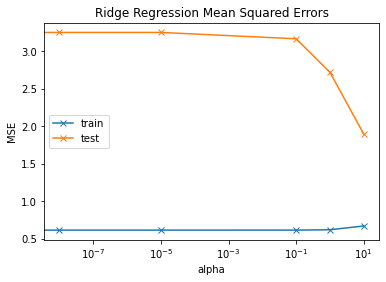

In [10]:
# Plotting train and test MSE vs alpha on log scale
fig = plt.figure()
plt.plot(ridge_alphas, ridge_error_train, '-x', label = 'train')
plt.plot(ridge_alphas, ridge_error_test, '-x', label = 'test')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression Mean Squared Errors')
plt.legend()
plt.xscale('log')

The optimal choice of alpha among the ones given is alpha = 10 because alpha = 10 has the lowest MSE on the testing part, so it implies that this model has the best bias-variance tradeoff.

In [11]:
# List of alphas
lasso_alphas = [1e-3, 1e-2, 1e-1, 1]
lasso_error_train = []
lasso_error_test = []

# Loop through alphas
for alpha in lasso_alphas:
    
    # Train lasso regression model using the training sets
    clf = linear_model.Lasso(alpha)
    clf.fit(X_train, y_train)
    
    # Make predictions using the df_rate training set
    y_pred_train = clf.predict(X_train)
    
    # Calculate mean squared error of the training prediction
    error_train = mean_squared_error(y_train, y_pred_train)
    lasso_error_train.append(error_train)
    
    # Make predictions using the df_rate testing set
    y_pred_test = clf.predict(X_test)
    
    # Calculate mean squared error of the test prediction
    error_test = mean_squared_error(y_test, y_pred_test)
    lasso_error_test.append(error_test)
    
    # Print error results
    print('Alpha: ', alpha)
    print('Mean squared error of the training part: ', error_train)
    print('Mean squared error of the testing part: ', error_test)
    print('-'*80)

Alpha:  0.001
Mean squared error of the training part:  0.6359078007727818
Mean squared error of the testing part:  2.280496045757267
--------------------------------------------------------------------------------
Alpha:  0.01
Mean squared error of the training part:  0.8932351906143894
Mean squared error of the testing part:  1.3742334226815167
--------------------------------------------------------------------------------
Alpha:  0.1
Mean squared error of the training part:  1.210230986955849
Mean squared error of the testing part:  1.2534246581541626
--------------------------------------------------------------------------------
Alpha:  1
Mean squared error of the training part:  1.2261539571148226
Mean squared error of the testing part:  1.2646356285936624
--------------------------------------------------------------------------------


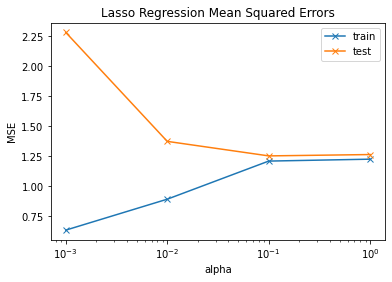

In [12]:
# Plotting train and test MSE vs alpha on log scale
fig = plt.figure()
plt.plot(lasso_alphas, lasso_error_train, '-x', label = 'train')
plt.plot(lasso_alphas, lasso_error_test, '-x', label = 'test')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso Regression Mean Squared Errors')
plt.legend()
plt.xscale('log')

The optimal choice of alpha among the ones given is alpha = 0.1 because it minimizes the MSE on the testing part, also implying that it yields a model with the best bias-variance tradeoff.